In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_excel("fullset.xlsx", engine="openpyxl")

In [3]:
# Inspecting the first few rows and the data types
print(data.head())
print("\ndata types: \n",data.dtypes)

   ID  Enjoyment  Commentary  \
0   1        1.0         2.0   
1   2        1.0         3.0   
2   3        1.0         5.0   
3   4        1.0         3.0   
4   5        4.0         3.0   

                                       Explain 1 & 2  Debates  \
0  To follow and enjoy ("extremely"): That's just...      5.0   
1                                                NaN      4.0   
2  I'm a fan of the books and can't wait for the ...      5.0   
3  Game of Thrones is probably the most amazing f...      3.0   
4  Too many other things to watch, and the show's...      3.0   

                                           Explain 4  Spoilers  \
0               I haven't followed so cannot answer.       1.0   
1                                                NaN       3.0   
2                                                NaN       3.0   
3                       What happens at next season.       4.0   
4  The debates around representation and genre, n...       2.0   

                   

### Overview of the Dataset

In [4]:
# Descriptive statistics for numerical features
print(data.describe())


                 ID     Enjoyment    Commentary       Debates      Spoilers  \
count  10638.000000  10636.000000  10636.000000  10636.000000  10636.000000   
mean    5319.500000      1.697631      2.825028      2.751692      2.488718   
std     3071.070416      0.859121      1.067773      1.104303      1.303846   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%     2660.250000      1.000000      2.000000      2.000000      1.000000   
50%     5319.500000      1.000000      3.000000      3.000000      2.000000   
75%     7978.750000      2.000000      4.000000      3.000000      3.000000   
max    10638.000000      5.000000      5.000000      5.000000      5.000000   

                Age           Sex   Class proxy      Politics  
count  10636.000000  10636.000000  10636.000000  10636.000000  
mean       4.370816      1.528112      3.683340      2.717657  
std        2.281041      0.520623      1.272378      1.358707  
min        1.000000      1.00000

In [5]:
# Descriptive statistics for categorical features
#print(data.describe(include=['category']))

### Distribution of Key Variables

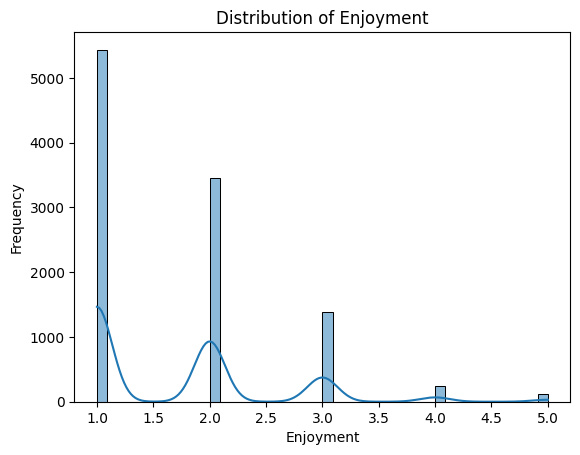

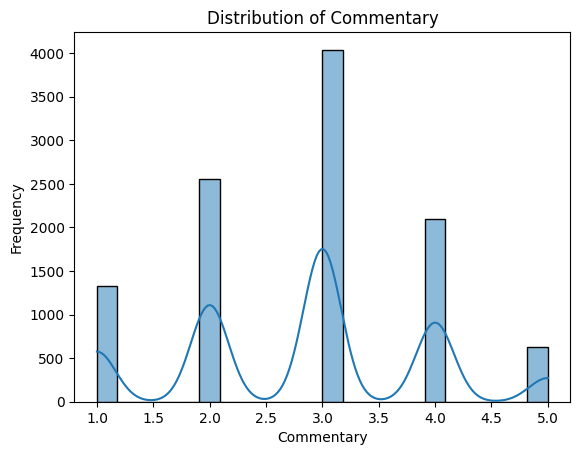

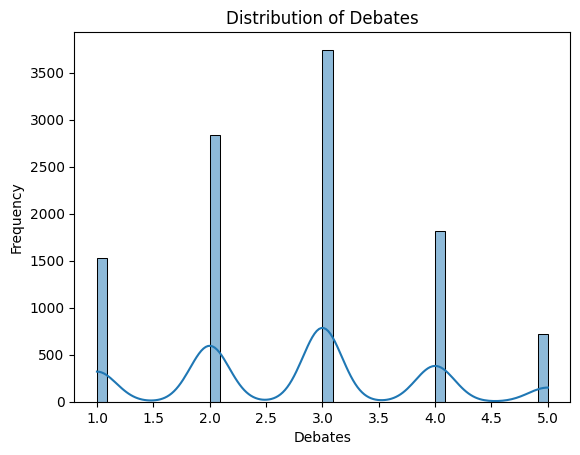

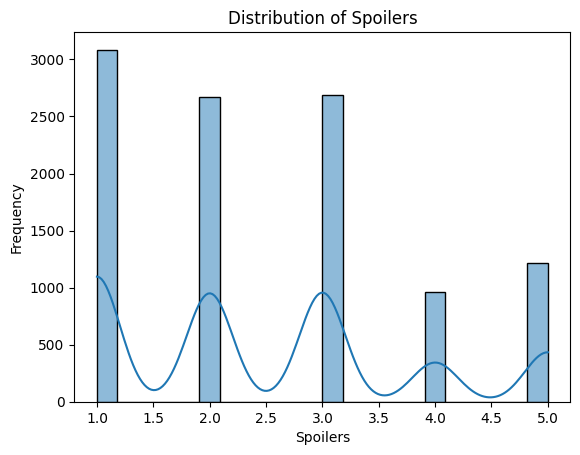

In [6]:
# Histograms for key numerical variables
for column in ['Enjoyment', 'Commentary', 'Debates', 'Spoilers']:
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

/tmp/ipykernel_2527/756006939.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


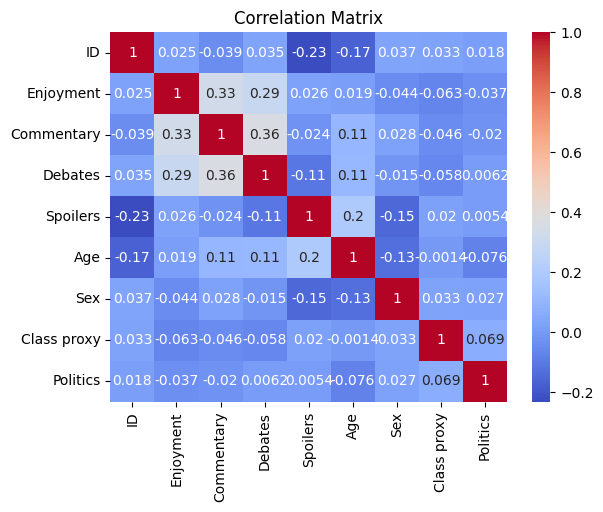

In [7]:
# Correlation matrix of numerical variables
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Enjoyment   1.0   2.0  3.0  4.0  5.0
Sex                                 
1.0        2487  1717  727  136   68
2.0        2908  1703  632  108   34
3.0          40    34   28    4   10


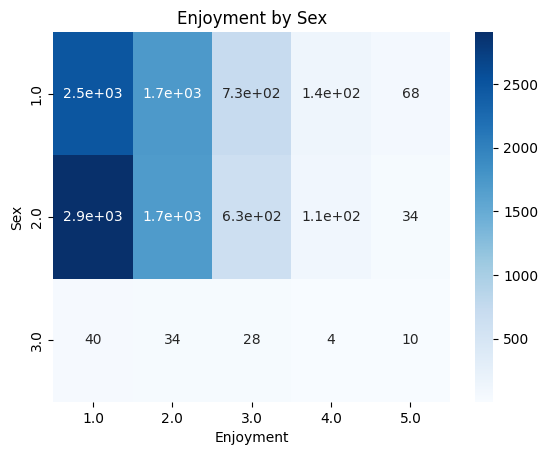

In [8]:
# Cross-tabulation of Sex and Enjoyment
sex_enjoyment_ct = pd.crosstab(data['Sex'], data['Enjoyment'])
print(sex_enjoyment_ct)

# Heatmap of the cross-tabulation
sns.heatmap(sex_enjoyment_ct, annot=True, cmap='Blues')
plt.title('Enjoyment by Sex')
plt.ylabel('Sex')
plt.xlabel('Enjoyment')
plt.show()


### Cleaning Demographic Data

In [9]:
# Fill missing values or drop rows if necessary
data['Age'].fillna(data['Age'].mean(), inplace=True)  # Replace missing ages with the average
data['Sex'].fillna(method='ffill', inplace=True)      # Forward fill missing sex data
data['Class proxy'].fillna(data['Class proxy'].mode()[0], inplace=True)  # Mode filling for class
data['Politics'].fillna(data['Politics'].mode()[0], inplace=True)        # Mode filling for politics

# Convert to appropriate data types
data['Sex'] = data['Sex'].astype('category')
data['Class proxy'] = data['Class proxy'].astype('category')
data['Politics'] = data['Politics'].astype('category')

### Analyzing Age Distribution

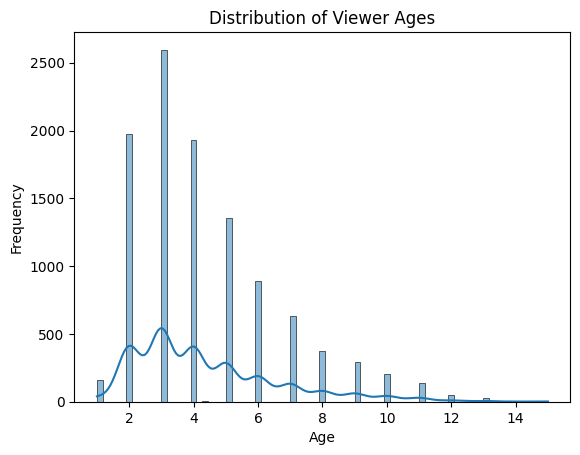

In [10]:


# Plotting the age distribution
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Viewer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


The histogram illustrates the distribution of ages among the viewers. It appears that the viewer age is somewhat normally distributed with a possible skew towards younger ages, indicating that "Game of Thrones" may have a younger audience demographic.

### Sex Distribution and Its Impact on Enjoyment

2.0    5385
1.0    5137
3.0     116
Name: Sex, dtype: int64


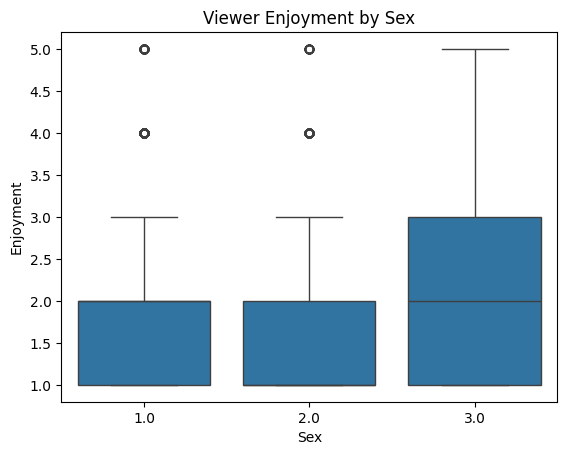

In [11]:
# Counting the number of viewers by sex
sex_counts = data['Sex'].value_counts()
print(sex_counts)

# Boxplot of Enjoyment by Sex
sns.boxplot(x='Sex', y='Enjoyment', data=data)
plt.title('Viewer Enjoyment by Sex')
plt.xlabel('Sex')
plt.ylabel('Enjoyment')
plt.show()


### Exploring Geographic Distribution

United States     3227
United Kingdom    1310
Spain             1056
Finland            513
Germany            501
                  ... 
Bhutan               1
Azerbaijan           1
Western Sahara       1
Isle of man          1
ndia                 1
Name: Live, Length: 134, dtype: int64


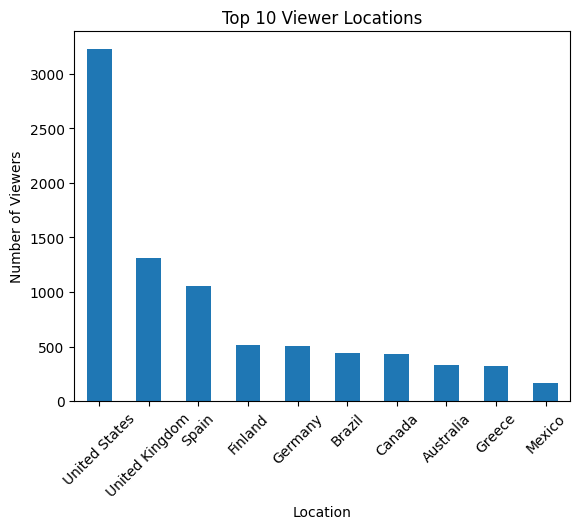

In [12]:
# Viewer count by geographic location (assuming 'Live' column contains this info)
location_counts = data['Live'].value_counts()
print(location_counts)

# Visualizing top 10 locations
location_counts.head(10).plot(kind='bar')
plt.title('Top 10 Viewer Locations')
plt.xlabel('Location')
plt.ylabel('Number of Viewers')
plt.xticks(rotation=45)
plt.show()


The dataset includes viewers primarily from US, UK, Spain, Finland. US has the highest number of viewers, followed by the United Kingdom and Spain.

### Analyzing Class and Politics

Viewer Class Distribution:
 4.0    3271
3.0    2728
5.0    2355
2.0    1125
1.0     646
6.0     346
7.0     167
Name: Class proxy, dtype: int64


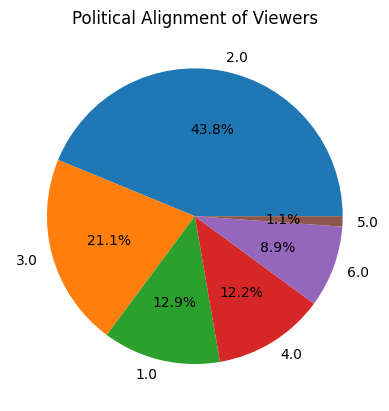

In [13]:
# Analyzing viewer class distribution
class_distribution = data['Class proxy'].value_counts()
print("Viewer Class Distribution:\n", class_distribution)

# Plotting political alignment of viewers
politics_counts = data['Politics'].value_counts()
politics_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Political Alignment of Viewers')
plt.ylabel('')
plt.show()


The majority of viewers fall into class categories '2.0' and '3.0', suggesting a significant portion of the audience comes from these socio-economic classes. Fewer viewers are in the lower classes ('5.0' and '6.0').

## Performing Sentiment Analysis

We'll use the TextBlob library to perform sentiment analysis on viewer responses. TextBlob provides a simple API to access common text-processing operations including sentiment analysis.

In [14]:
from textblob import TextBlob

# Define a function to calculate sentiment polarity
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [15]:
data.columns

Index(['ID', 'Enjoyment', 'Commentary', 'Explain 1 & 2', 'Debates',
       'Explain 4', 'Spoilers', 'Explain 6', 'Ways of watching',
       'Favourite character', 'Favourite survivor', 'Kind of story',
       'Book importance', 'Other stories', 'Lands peoples', 'Fantasy roles',
       'Most memorable', 'Most uncomfortable', 'Other activities', 'Age',
       'Sex', 'Class proxy', 'Politics', 'Live', 'Personal',
       'Winter is coming', 'Random'],
      dtype='object')

In [16]:
# Fill missing values with an empty string to avoid errors during processing
data['Explain 1 & 2'].fillna('', inplace=True)
data['Explain 4'].fillna('', inplace=True)
data['Explain 6'].fillna('', inplace=True)
data['Ways of watching'].fillna('', inplace=True)
data['Favourite character'].fillna('', inplace=True)
data['Favourite survivor'].fillna('', inplace=True)
data['Book importance'].fillna('', inplace=True)
data['Other stories'].fillna('', inplace=True)
data['Lands peoples'].fillna('', inplace=True)
data['Most memorable'].fillna('', inplace=True)
data['Most uncomfortable'].fillna('', inplace=True)
data['Other activities'].fillna('', inplace=True)
data['Personal'].fillna('', inplace=True)
data['Winter is coming'].fillna('', inplace=True)

In [17]:
# Apply the sentiment analysis function to the textual columns
data['Sentiment Explain 1 & 2'] = data['Explain 1 & 2'].apply(calculate_sentiment)
data['Sentiment Explain 4'] = data['Explain 4'].apply(calculate_sentiment)

data['Sentiment Explain 6'] = data['Explain 6'].apply(calculate_sentiment)
data['Sentiment Ways of watching'] = data['Ways of watching'].apply(calculate_sentiment)
data['Sentiment Favourite character'] = data['Favourite character'].apply(calculate_sentiment)
data['Sentiment Favourite survivor'] = data['Favourite survivor'].apply(calculate_sentiment)
data['Sentiment Book importance'] = data['Book importance'].apply(calculate_sentiment)
data['Sentiment Other stories'] = data['Other stories'].apply(calculate_sentiment)
data['Sentiment Lands peoples'] = data['Lands peoples'].apply(calculate_sentiment)
data['Sentiment Most memorable'] = data['Most memorable'].apply(calculate_sentiment)
data['Sentiment Most uncomfortable'] = data['Most uncomfortable'].apply(calculate_sentiment)
data['Sentiment Lands peoples'] = data['Lands peoples'].apply(calculate_sentiment)

data['Sentiment Personal'] = data['Personal'].apply(calculate_sentiment)
data['Sentiment Winter is coming'] = data['Winter is coming'].apply(calculate_sentiment)

In [18]:
data.head()

,ID,Enjoyment,Commentary,Explain 1 & 2,Debates,Explain 4,Spoilers,Explain 6,Ways of watching,Favourite character,...,Sentiment Ways of watching,Sentiment Favourite character,Sentiment Favourite survivor,Sentiment Book importance,Sentiment Other stories,Sentiment Lands peoples,Sentiment Most memorable,Sentiment Most uncomfortable,Sentiment Personal,Sentiment Winter is coming
0,1,1.0,2.0,"To follow and enjoy (""extremely""): That's just...",5.0,I haven't followed so cannot answer.,1.0,Well this wasn't actually an spoiler but my ow...,"Alone, several episodes at a time. I watched a...",Tyrion Lannister is one of my favorites (as is...,...,0.208333,0.277778,0.276429,0.000000,0.01250,0.2200,0.035714,-0.023750,0.286000,-0.000568
1,2,1.0,3.0,,4.0,,3.0,,"Alone, multiple episodes at the time. I´ll try...",I´ll like almost everybody in the serious. I u...,...,0.233333,0.244444,0.235000,-0.066667,0.00000,0.0000,0.000000,-0.280000,0.408333,0.200000
2,3,1.0,5.0,I'm a fan of the books and can't wait for the ...,5.0,,3.0,,I watch it with my husband one episode at a ti...,"Arya, Jon and Tyrion. I read from a Martin's i...",...,0.000000,0.700000,0.000000,0.325000,-0.09375,-0.1625,0.000000,0.000000,0.150000,-0.025000
3,4,1.0,3.0,Game of Thrones is probably the most amazing f...,3.0,What happens at next season.,4.0,,"Alone, and very moment that it's available. I ...","I just love Tyrion, he's so smart, funny and b...",...,0.300000,0.441071,0.000000,0.400000,0.00000,0.0000,0.000000,-0.311667,0.000000,0.000000
4,5,4.0,3.0,"Too many other things to watch, and the show's...",3.0,"The debates around representation and genre, n...",2.0,I have a friend on Facebook who is militantly ...,"With others, one episode at a time, delayed un...",,...,0.200000,0.000000,0.000000,0.112500,-0.10000,0.0000,0.000000,-0.281250,-0.145238,-0.016667


In [19]:
# List of sentiment columns
sentiment_columns = [
    'Sentiment Explain 1 & 2', 'Sentiment Explain 4', 'Sentiment Explain 6', 
    'Sentiment Ways of watching', 'Sentiment Favourite character', 'Sentiment Favourite survivor', 
    'Sentiment Book importance', 'Sentiment Other stories', 'Sentiment Lands peoples', 
    'Sentiment Most memorable', 'Sentiment Most uncomfortable', 'Sentiment Personal', 
    'Sentiment Winter is coming'
]

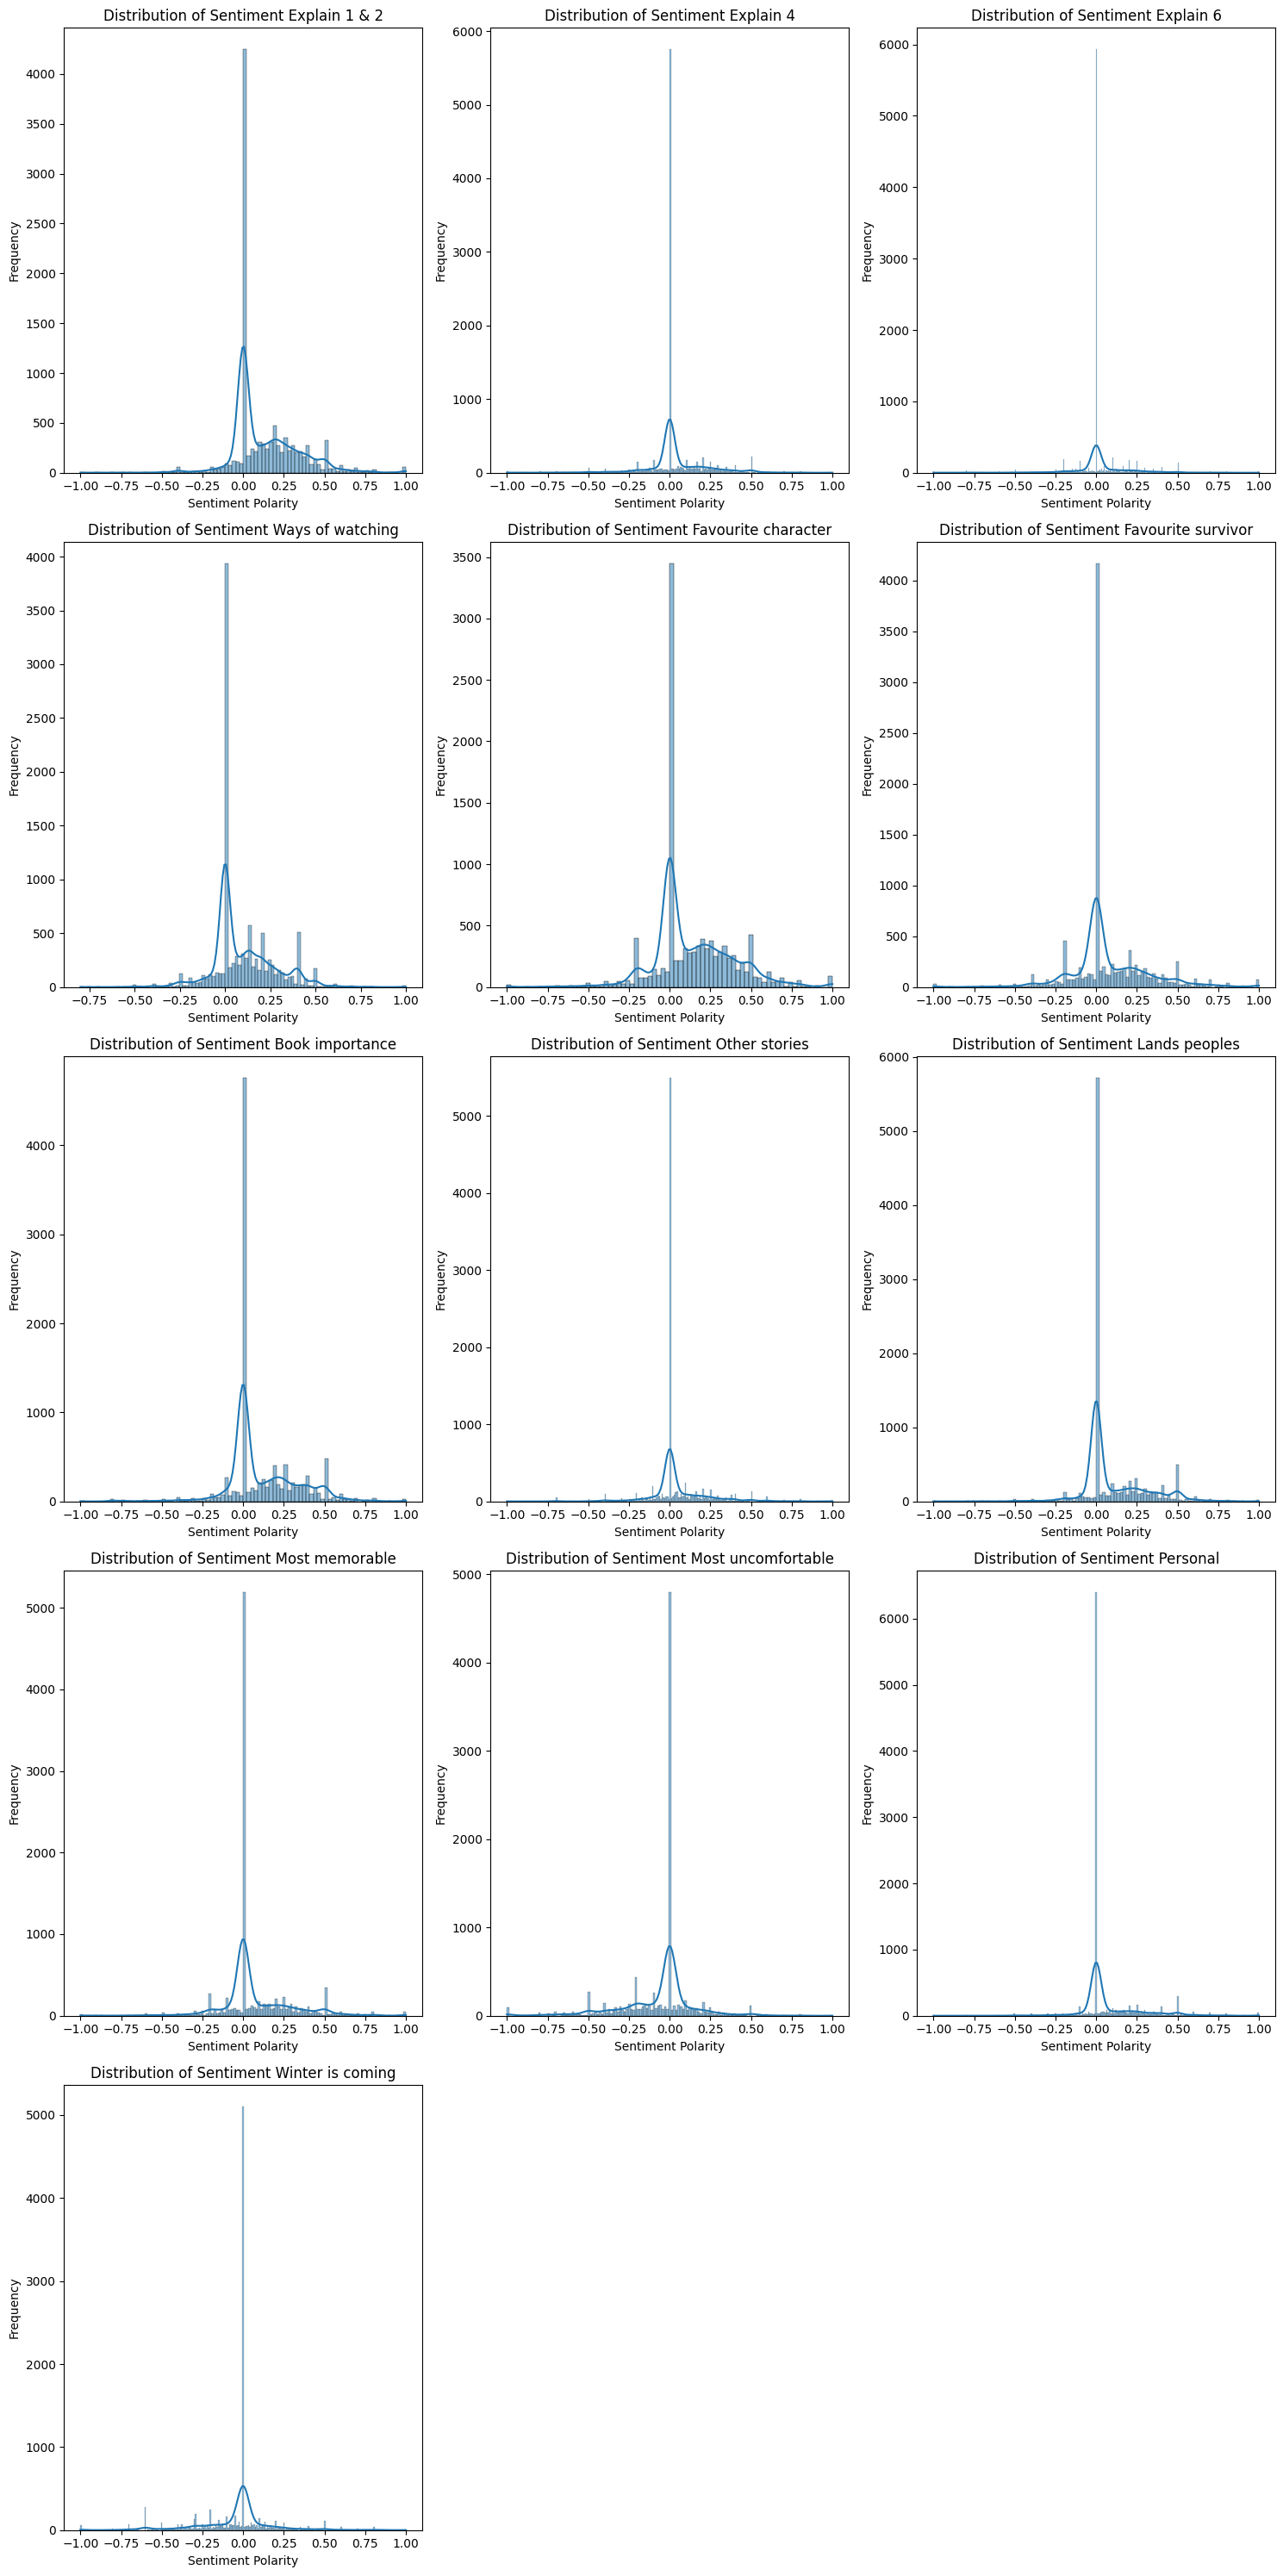

In [20]:
# Creating the plots for all sentiment columns
fig, axes = plt.subplots(nrows=(len(sentiment_columns) + 2) // 3, ncols=3, figsize=(15, 30))
axes = axes.flatten()

for i, sentiment_column in enumerate(sentiment_columns):
    sns.histplot(data[sentiment_column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {sentiment_column}')
    axes[i].set_xlabel('Sentiment Polarity')
    axes[i].set_ylabel('Frequency')

# Hide any unused axes
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Here’s a detailed analysis of the plots:

- Explain 1 & 2: The distribution is sharply peaked around a neutral sentiment, with very few responses veering into either positive or negative territory. This could suggest that while viewers have opinions on the topics in question, their emotional reactions are not particularly strong, or the language used is more factual than emotional.
- Explain 4: Similar to the first, this plot also indicates a strong concentration of neutral sentiments, with sparse positive and negative responses.
- Explain 6: Again, there's a strong peak at neutrality, with some lean towards positive sentiment. This may suggest that when viewers do express emotions, they tend to be slightly positive.
Ways of Watching: This plot shows a neutral sentiment peak, suggesting that viewers’ comments on how they watch the show do not carry strong emotional language.
- Favourite Character: Viewers show a strong neutral sentiment when discussing their favorite character, which could imply that the way they talk about their favorites is not heavily laden with emotional language.
- Favourite Survivor: As with favorite characters, the sentiment is overwhelmingly neutral. This neutrality might be due to discussions of favorite survivors being more analytical than emotional.
Book Importance: The sentiment peaks at neutral, suggesting that discussions about the importance of the books in relation to the series are not highly emotional.
- Other Stories: Neutral sentiment dominates, which may indicate a factual or neutral discussion of other stories compared to "Game of Thrones".
- Lands Peoples: The sentiment is neutral with a slight skew towards positive. This could indicate that viewers have a mild positive emotional response when discussing the different lands and peoples in the series.
- Most Memorable: The sentiment here is largely neutral with a minor positive sentiment, implying that while viewers remember certain aspects vividly, their language may not be overtly emotional.
- Most Uncomfortable: Sentiment is largely neutral, with a very slight negative skew. This is interesting as discomfort could be expected to elicit a stronger negative sentiment, yet the language viewers use may be restrained.
- Personal: Viewers' personal comments maintain a neutral sentiment. Personal anecdotes or connections to the series may be explained in neutral terms, perhaps reflecting a diverse array of personal experiences.
- Winter is Coming: The sentiment is mainly neutral, which might indicate that the iconic phrase often sparks discussion without strong emotional language.

# A) Sentiment Changes in Relation to Specific Characters:

#### For Section A, we're interested in understanding if the sentiment of viewer responses on the ideas of 'leadership' or 'monarchy' changes in relation to specific characters in "Game of Thrones"

In [21]:
# Step 1: Keyword Filtering for Leadership or Monarchy

additional_textual_columns = [
    'Explain 1 & 2', 'Explain 4','Explain 6', 
    'Ways of watching', 'Favourite character', 'Favourite survivor', 
    'Book importance', 'Other stories', 'Lands peoples', 
    'Most memorable', 'Most uncomfortable', 'Personal', 
    'Winter is coming'
]

# List of sentiment columns
sentiment_columns = [
    'Sentiment Explain 1 & 2', 'Sentiment Explain 4', 'Sentiment Explain 6', 
    'Sentiment Ways of watching', 'Sentiment Favourite character', 'Sentiment Favourite survivor', 
    'Sentiment Book importance', 'Sentiment Other stories', 'Sentiment Lands peoples', 
    'Sentiment Most memorable', 'Sentiment Most uncomfortable', 'Sentiment Personal', 
    'Sentiment Winter is coming'
]

characters = ['Jon', 'Daenerys', 'Cersei', 'Tyrion', 'Sansa', 'Arya']

# Keywords related to leadership and monarchy
leadership_keywords = ['leadership', 'monarchy', 'king', 'queen', 'throne', 'rule', 'ruler']

# Function to check if any keywords are in text
def contains_keywords(text, keywords):
    return any(keyword in text.lower() for keyword in keywords)

# Filter responses across multiple columns that contain any of the leadership keywords
filtered_data = data.apply(lambda row: any(contains_keywords(row[col], leadership_keywords) for col in additional_textual_columns), axis=1)


In [22]:
filtered_data

0         True
1        False
2         True
3         True
4         True
         ...  
10633    False
10634     True
10635     True
10636    False
10637    False
Length: 10638, dtype: bool

In [23]:
# Calculate sentiment across multiple columns and create a new DataFrame for sentiments
sentiment_data = pd.DataFrame()
for column in additional_textual_columns:
    sentiment_data[f'Sentiment {column}'] = data[column].apply(calculate_sentiment)


In [24]:
sentiment_data.head()

,Sentiment Explain 1 & 2,Sentiment Explain 4,Sentiment Explain 6,Sentiment Ways of watching,Sentiment Favourite character,Sentiment Favourite survivor,Sentiment Book importance,Sentiment Other stories,Sentiment Lands peoples,Sentiment Most memorable,Sentiment Most uncomfortable,Sentiment Personal,Sentiment Winter is coming
0,0.079762,0.000000,0.1,0.208333,0.277778,0.276429,0.000000,0.01250,0.2200,0.035714,-0.023750,0.286000,-0.000568
1,0.000000,0.000000,0.0,0.233333,0.244444,0.235000,-0.066667,0.00000,0.0000,0.000000,-0.280000,0.408333,0.200000
2,0.066667,0.000000,0.0,0.000000,0.700000,0.000000,0.325000,-0.09375,-0.1625,0.000000,0.000000,0.150000,-0.025000
3,0.085185,0.000000,0.0,0.300000,0.441071,0.000000,0.400000,0.00000,0.0000,0.000000,-0.311667,0.000000,0.000000
4,-0.156250,0.166667,0.0,0.200000,0.000000,0.000000,0.112500,-0.10000,0.0000,0.000000,-0.281250,-0.145238,-0.016667


In [25]:
import numpy as np 

In [26]:
# Aggregate Sentiment by Character Across All Columns
# Aggregate sentiment for each character across all relevant sentiment columns
character_sentiment = {character: [] for character in characters}
for character in characters:
    print("\n--------------------------\ncharacter : ", character)
    for col in additional_textual_columns:
        print("column : ", col)
        character_data = data[data[col].str.contains(character, case=False)]
        print(" Number of mentions in the column = ", len(character_data))
        character_sentiment[character].append(character_data["Sentiment " + col].mean())
    character_sentiment[character] = np.mean(character_sentiment[character])  # Average sentiment across all columns


--------------------------
character :  Jon
column :  Explain 1 & 2
 Number of mentions in the column =  21
column :  Explain 4
 Number of mentions in the column =  928
column :  Explain 6
 Number of mentions in the column =  1259
column :  Ways of watching
 Number of mentions in the column =  8
column :  Favourite character
 Number of mentions in the column =  1980
column :  Favourite survivor
 Number of mentions in the column =  573
column :  Book importance
 Number of mentions in the column =  24
column :  Other stories
 Number of mentions in the column =  29
column :  Lands peoples
 Number of mentions in the column =  54
column :  Most memorable
 Number of mentions in the column =  1105
column :  Most uncomfortable
 Number of mentions in the column =  375
column :  Personal
 Number of mentions in the column =  43
column :  Winter is coming
 Number of mentions in the column =  109

--------------------------
character :  Daenerys
column :  Explain 1 & 2
 Number of mentions in the c

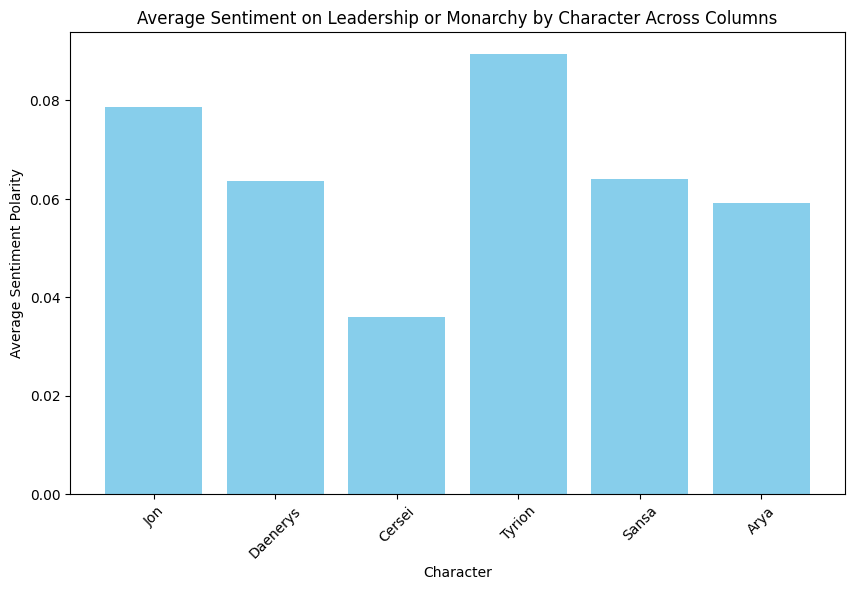

In [27]:
# Visualize the average sentiment for each character across all columns
plt.figure(figsize=(10, 6))
plt.bar(character_sentiment.keys(), character_sentiment.values(), color='skyblue')
plt.title('Average Sentiment on Leadership or Monarchy by Character Across Columns')
plt.xlabel('Character')
plt.ylabel('Average Sentiment Polarity')
plt.xticks(rotation=45)
plt.show()


The bar chart generated represents the average sentiment polarity associated with specific characters from "Game of Thrones" in the context of 'leadership' or 'monarchy'. The sentiment polarity scores range from 0 to just over 0.08, which suggests that the overall emotional tone in viewer responses is relatively positive, albeit with subtle differences between characters. Here's a detailed analysis:

1. **Jon**: Jon has a high sentiment score, indicating that mentions of him in the context of leadership or monarchy elicit relatively positive responses from viewers. This could suggest that his portrayal as a leader is well-received, or that his narrative arc aligns positively with viewers' sentiments about leadership.

2. **Daenerys**: Her sentiment score is moderately positive but lower than Jon's. This could reflect mixed feelings among viewers regarding her claim to the throne or her actions as a leader throughout the series.

3. **Cersei**: Cersei's sentiment score is the lowest among the characters. This might reflect viewers' negative perceptions of her leadership style or disapproval of her actions, consistent with her role as a more antagonistic character.

4. **Tyrion**: Tyrion shows a very high sentiment score, perhaps the highest among the characters. This suggests a strong positive response to his character in the context of leadership. Viewers may appreciate his wit and wisdom in political and leadership roles.

5. **Sansa**: Sansa has a sentiment score that's moderately positive. As her character grew into a leadership role over the course of the series, this score might reflect viewers' approval of her development and actions as a leader.

6. **Arya**: Arya's sentiment score is slightly less positive compared to Sansa but still on the positive side. Given Arya's less direct involvement with leadership or ruling compared to the other characters, this score may stem from her personal growth and actions that influence the leadership dynamics in the show.

#### conclusions:
- **Polarity Range**: The sentiment polarity is generally low, suggesting that while there is a tendency towards positive sentiment, strong emotional language is not prevalent in the viewers' responses. 
- **Character Roles**: Sentiments seem to correlate with the characters' roles and development in the series. Leaders or characters who exhibit strong moral qualities or undergo significant development appear to have higher sentiment scores.
- **Viewer Engagement**: The positive sentiment scores indicate a level of engagement and emotional investment from viewers, which is crucial for character-driven narratives like "Game of Thrones".
- **Contextual Interpretation**: It’s important to consider that the sentiment analysis may not fully capture nuanced viewer opinions or the context of how characters' actions are discussed.

This analysis provides a quantitative measure of how viewers' sentiments align with the series' portrayal of different characters in positions of power. It’s valuable for understanding which characters resonate positively or negatively with the audience when discussing leadership themes.

/tmp/ipykernel_2527/2517580734.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(character_data['Sentiment Explain 1 & 2'].dropna(), label=character)
/tmp/ipykernel_2527/2517580734.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(character_data['Sentiment Explain 1 & 2'].dropna(), label=cha

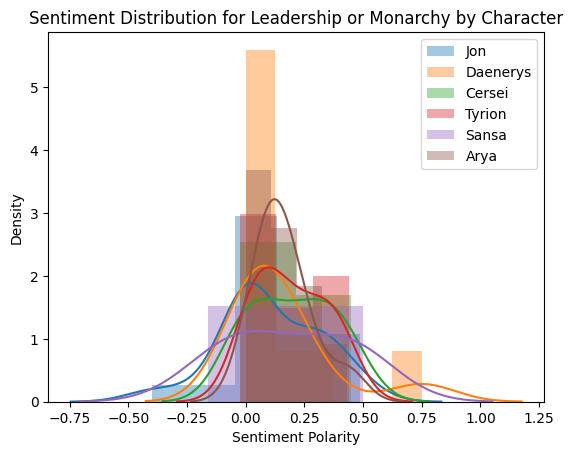

In [28]:
for character in characters:
    character_data = data[data['Explain 1 & 2'].str.contains(character, case=False, na=False)]
    sns.distplot(character_data['Sentiment Explain 1 & 2'].dropna(), label=character)
plt.title('Sentiment Distribution for Leadership or Monarchy by Character')
plt.xlabel('Sentiment Polarity')
plt.legend()
plt.show()


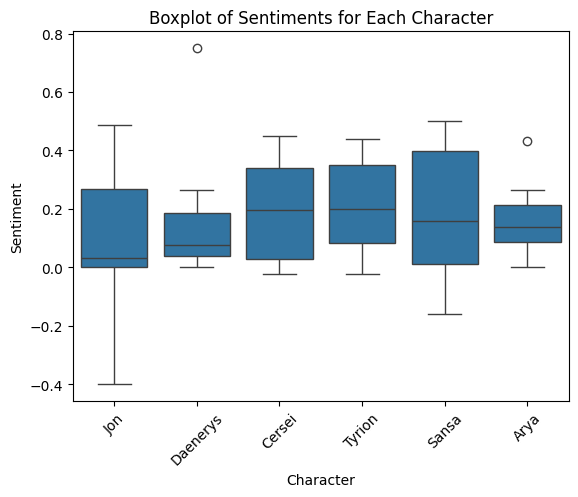

In [29]:
# Create a new DataFrame to hold sentiment values and associated character
sentiments = []
for character in characters:
    character_data = data[data['Explain 1 & 2'].str.contains(character, case=False, na=False)]
    sentiments.extend([(s, character) for s in character_data['Sentiment Explain 1 & 2']])
sentiment_df = pd.DataFrame(sentiments, columns=['Sentiment', 'Character'])

sns.boxplot(x='Character', y='Sentiment', data=sentiment_df)
plt.xticks(rotation=45)
plt.title('Boxplot of Sentiments for Each Character')
plt.show()


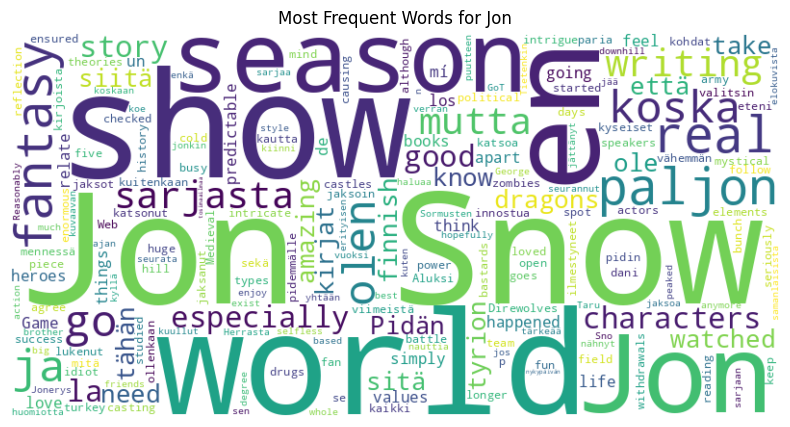

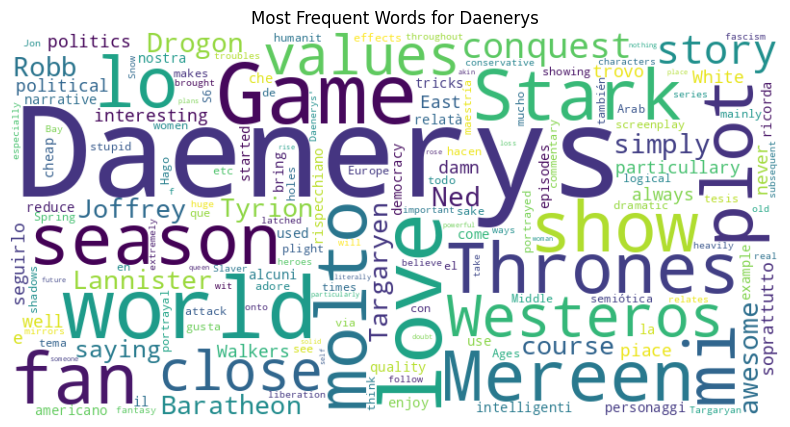

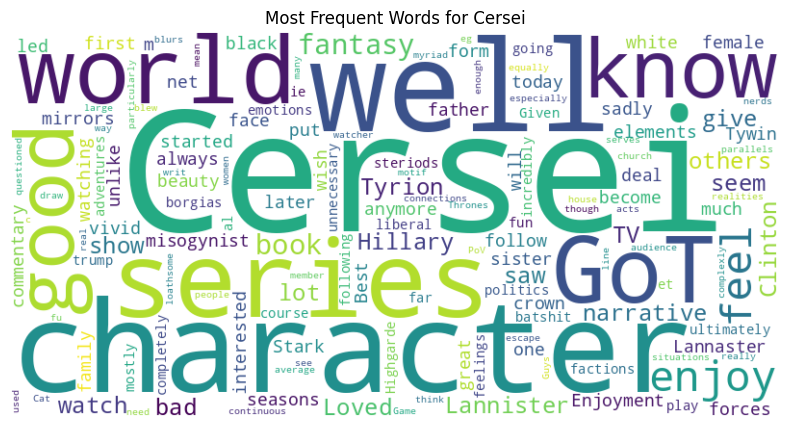

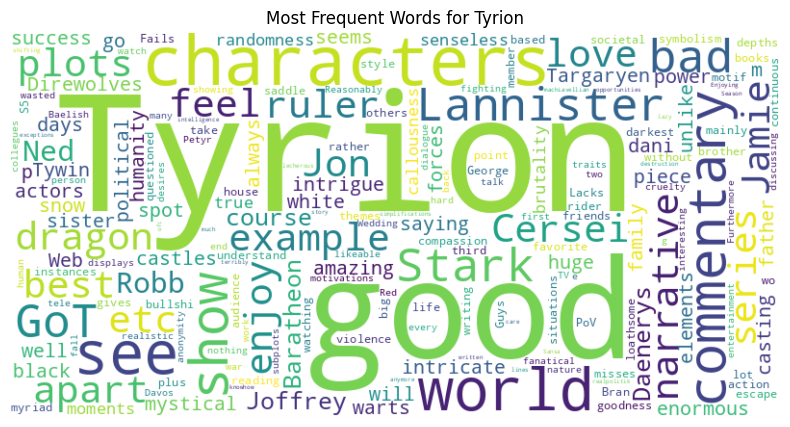

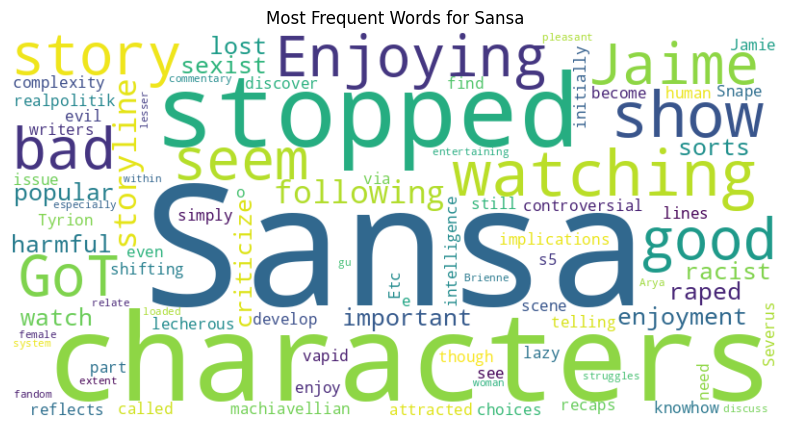

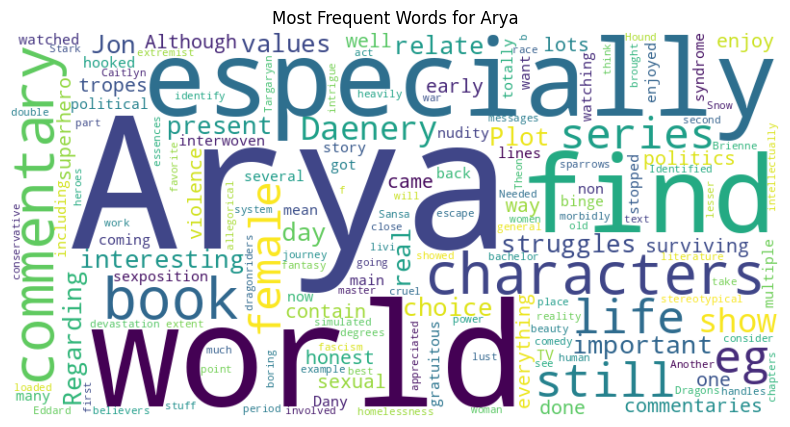

In [30]:
from wordcloud import WordCloud

for character in characters:
    text = " ".join(data[data['Explain 1 & 2'].str.contains(character, case=False, na=False)]['Explain 1 & 2'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Most Frequent Words for {character}')
    plt.axis('off')
    plt.show()


# B) engagement and preferences of Game of Thrones viewers vary significantly based on demographic factors such as age, gender, or geographic location.

How engagement and preferences of "Game of Thrones" viewers vary based on demographic factors such as age, gender, or geographic location. 

In [31]:
#Step 1: Prepare Demographic Data
# Ensure that demographic data is in the correct format
data['Age'] = data['Age'].astype(int)
data['Sex'] = data['Sex'].astype('category')
data['Live'] = data['Live'].astype('category')


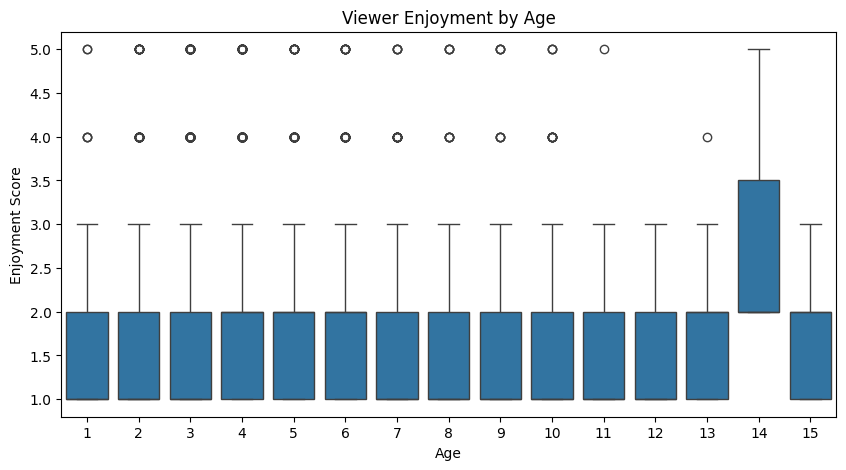

In [32]:
# Step 2: Engagement and Preferences Analysis by Age
# Visualization of engagement by age using Enjoyment as an engagement metric
plt.figure(figsize=(10, 5))
sns.boxplot(x='Age', y='Enjoyment', data=data)
plt.title('Viewer Enjoyment by Age')
plt.xlabel('Age')
plt.ylabel('Enjoyment Score')
plt.show()


- Consistent Median: The median enjoyment score seems consistent across most age groups, hovering around the 2.5 mark. This suggests that the median level of enjoyment does not vary significantly with age.
- Outliers: There are outliers present in almost every age category. These outliers are scores that lie outside the typical range and could indicate individuals with particularly high enjoyment levels compared to their peers.
- Variability and Range: The interquartile range (IQR) varies slightly among age groups but remains relatively tight for most, suggesting that half of the responses are clustered within a narrow range of enjoyment scores. Age groups 12 and 14 stand out with a higher IQR, indicating more variability in how these age groups enjoyed the show.
- Age Group 15: The 15th age group shows a higher median enjoyment score and a larger IQR than the other age groups. This group also has a significant range indicated by the length of the whiskers, showing that there are viewers who have rated their enjoyment quite differently from the median.
Skewness: Most age groups have a symmetric distribution of enjoyment scores around the median, while age group 15 appears right-skewed, with a tail extending towards higher enjoyment scores.
- Data Sparsity: The number of data points seems to decrease with age, as seen by the number of outliers, which could suggest fewer survey responses from older age groups.

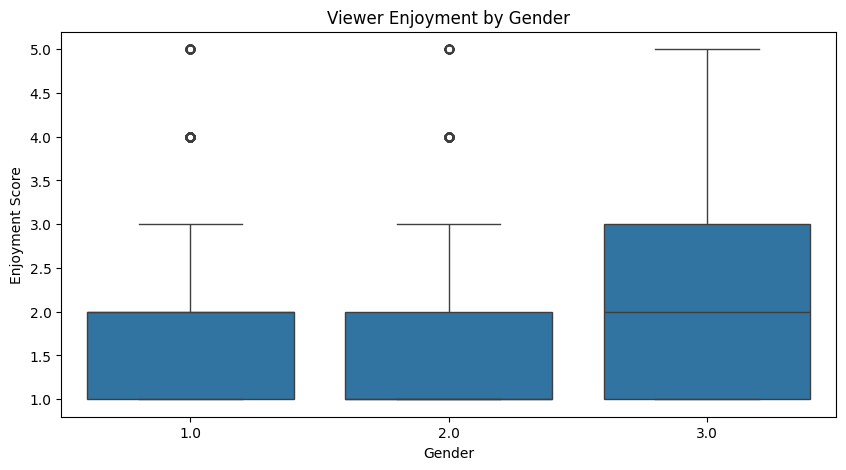

In [33]:
# Step 3: Engagement and Preferences Analysis by Gender
# Visualization of engagement by gender
plt.figure(figsize=(10, 5))
sns.boxplot(x='Sex', y='Enjoyment', data=data)
plt.title('Viewer Enjoyment by Gender')
plt.xlabel('Gender')
plt.ylabel('Enjoyment Score')
plt.show()


- Median Scores: The median enjoyment scores for genders 1.0 and 2.0 are very similar, lying just above the 2.5 mark. This indicates that the median response in terms of enjoyment does not significantly differ between these two groups.
- Spread and Variability: Gender 3.0 shows a much larger interquartile range (IQR), suggesting more variability in enjoyment scores compared to the other two groups. This could imply a more diverse set of opinions or experiences with the show within this group.
- Outliers: All three gender groups show outliers, with groups 1.0 and 2.0 having outliers at the upper end and group 3.0 having outliers at both ends. This indicates that there are some viewers within each gender category who rate their enjoyment significantly different from the majority.
- Whisker Length: The length of the whiskers varies across the groups, with gender 3.0 having the longest whiskers indicating a broader range of enjoyment scores, and genders 1.0 and 2.0 having similar ranges.

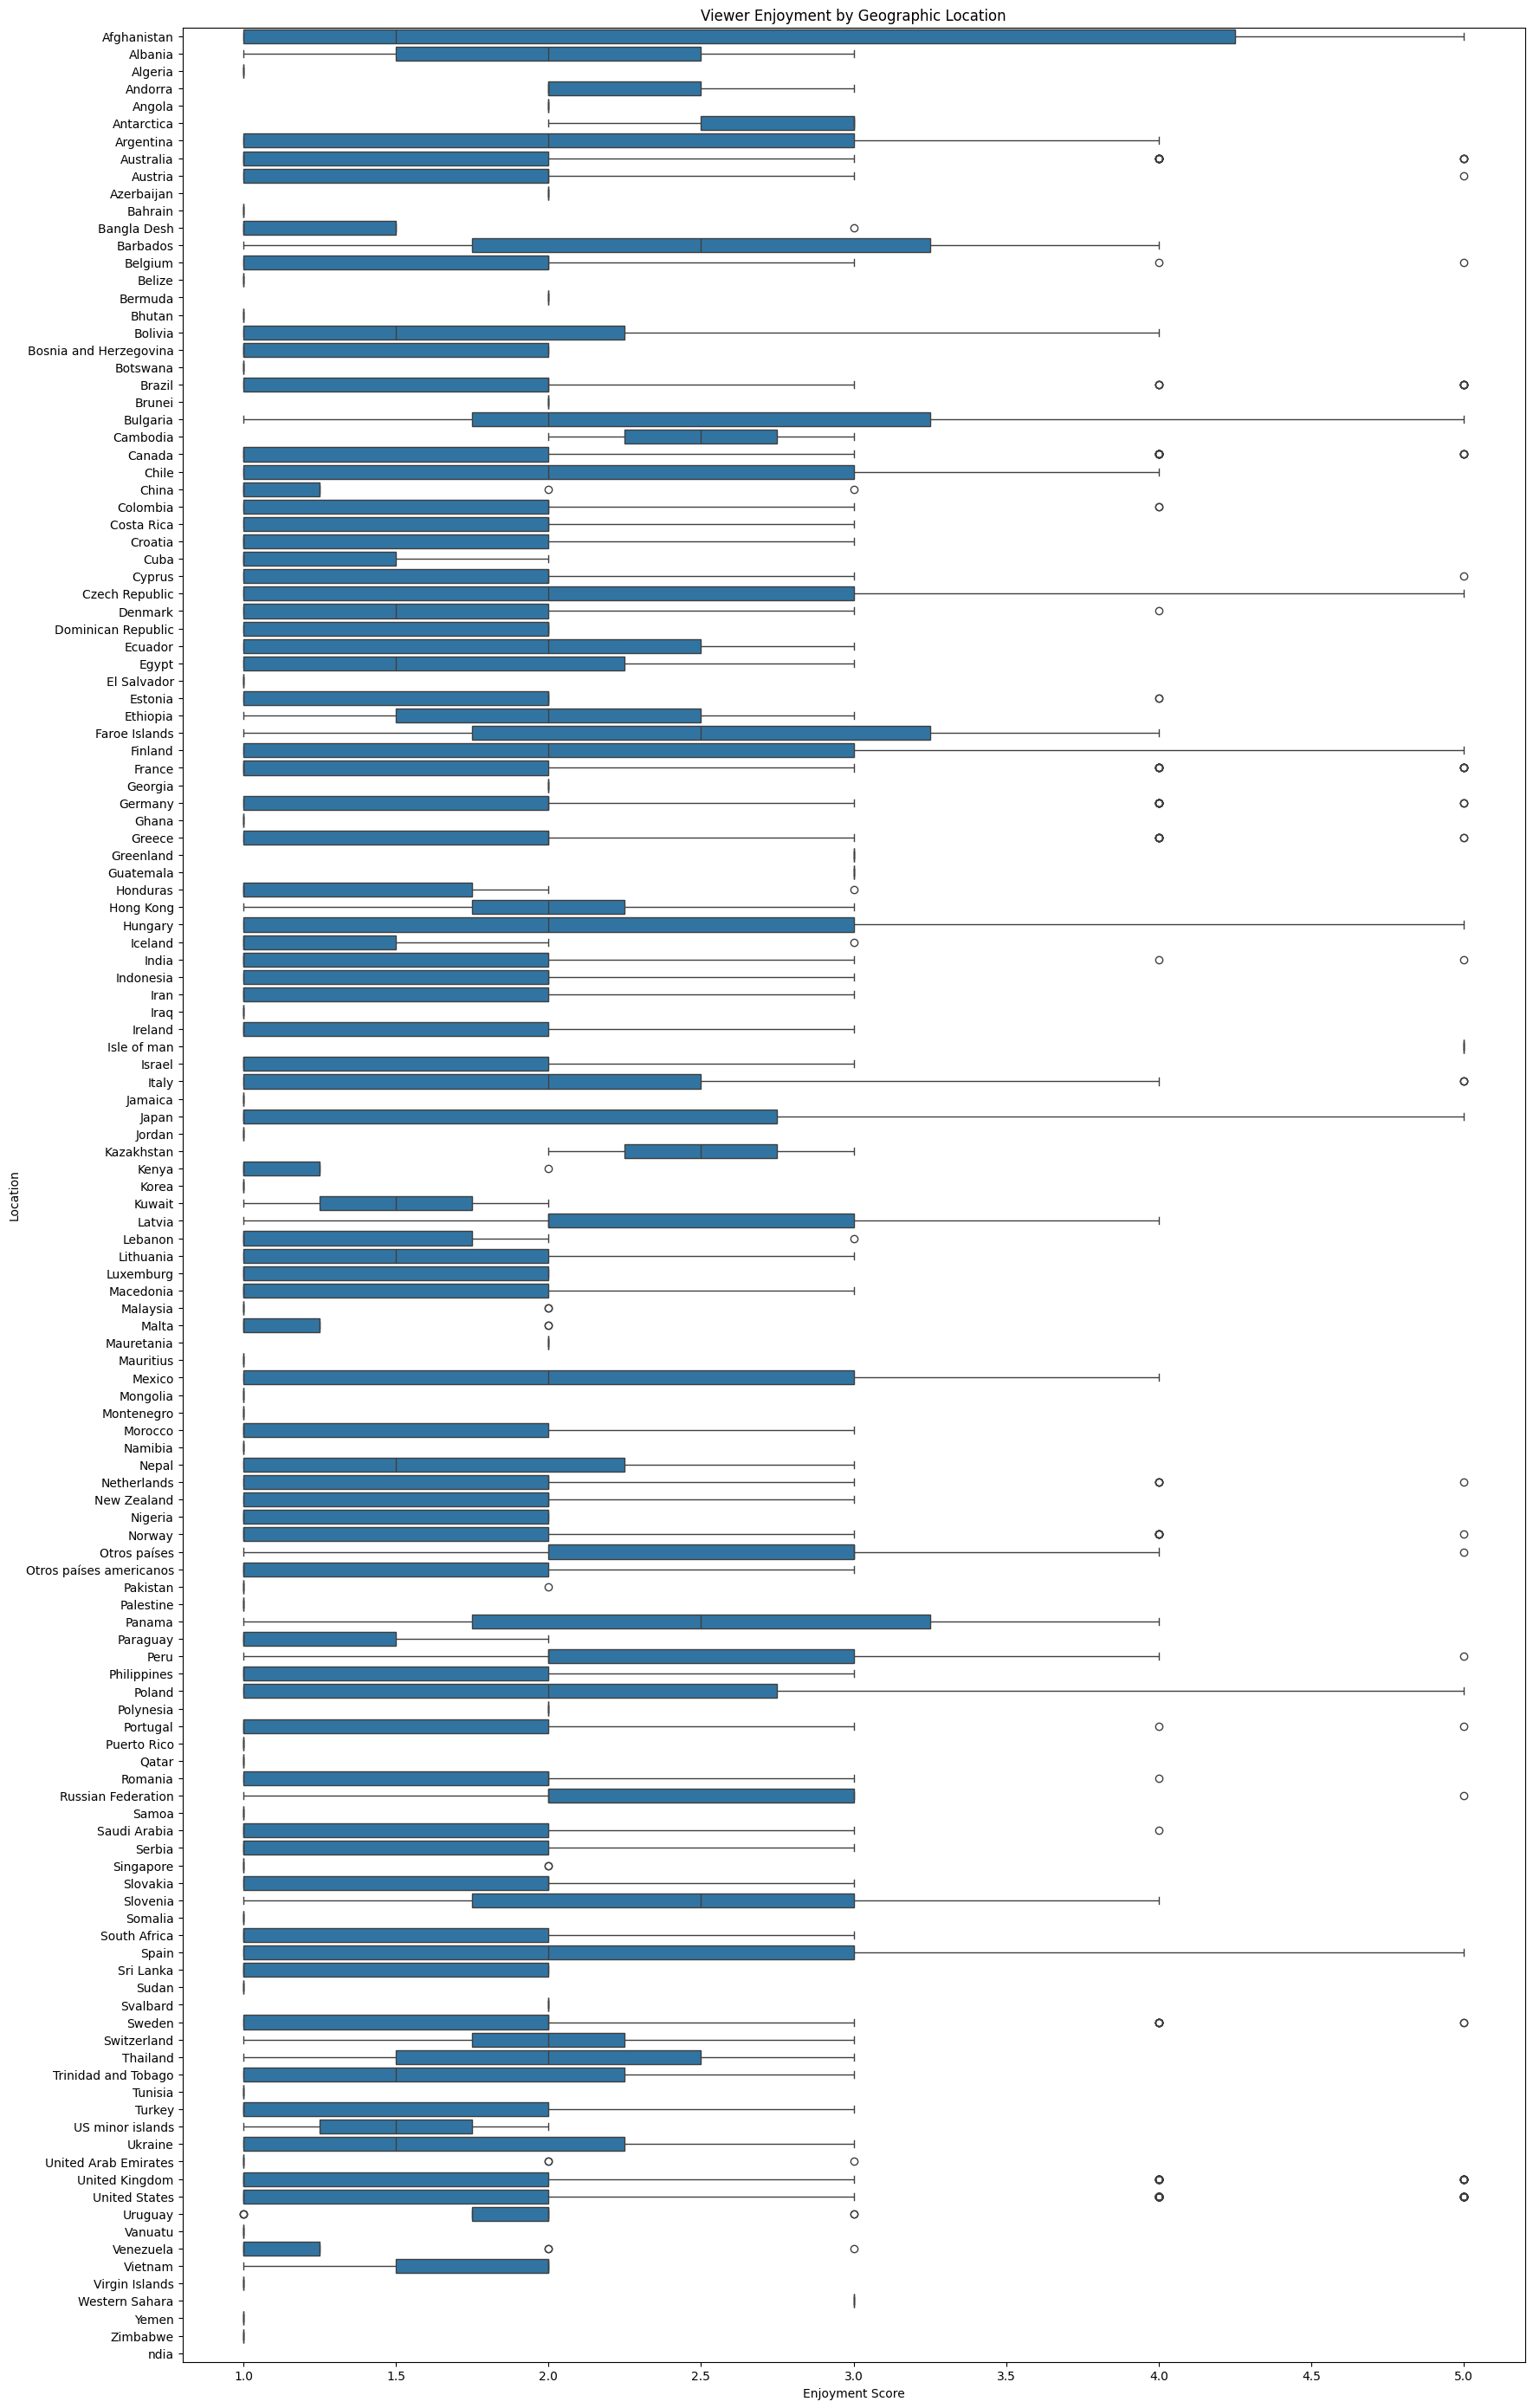

In [34]:
plt.figure(figsize=(20, 35))
sns.boxplot(y='Live', x='Enjoyment', data=data)
plt.title('Viewer Enjoyment by Geographic Location')
plt.ylabel('Location')
plt.xlabel('Enjoyment Score')
plt.show()


- Variation Among Countries: Different countries have varying median enjoyment scores. Some countries like Afghanistan have a higher median enjoyment score, whereas others like Australia have a lower median.
- Outliers: There are countries with outliers, indicating viewers whose enjoyment scores are notably different from the bulk of viewers in their respective countries. For instance, Austria has outliers on both the lower and higher ends.
- Interquartile Range (IQR): The IQR varies between countries, with some like Azerbaijan having a relatively tight IQR, indicating less variation in enjoyment scores within that country. Others, like Belgium, have a wider IQR, showing more varied responses among viewers.
- Data Sparsity: Some countries like Angola and Andorra seem to have fewer data points, indicated by the lack of visible boxes and whiskers, which suggests fewer respondents or less variability in their responses.

# C) If the relationships and interactions between characters can be analysed as a network, revealing patterns of alliances, conflicts, and impact on viewer satisfaction.

In [38]:
import pandas as pd
import spacy
from collections import defaultdict

# Load the spacy model
nlp = spacy.load('en_core_web_sm')

characters = ['Jon', 'Daenerys', 'Cersei', 'Tyrion', 'Sansa', 'Arya']

# Function to extract character mentions and assumed relationships
def extract_relationships(text, character_names):
    doc = nlp(text)
    character_relationships = defaultdict(int)

    # Use spacy's named entity recognition
    for ent in doc.ents:
        if ent.label_ == 'PERSON' and ent.text in character_names:
            # Look for conjuncts to this entity
            for conj in ent.conjuncts:
                if conj.text in character_names:
                    pair = tuple(sorted([ent.text, conj.text]))
                    character_relationships[pair] += 1  # Count the number of mentions

    return character_relationships

# Initialize a dictionary to hold all relationships
all_relationships = defaultdict(int)

# Iterate over the comments in all text columns and extract relationships
for column in additional_textual_columns[:3]: # Take first 3 columns to limit
    for comment in data[column].dropna():  # Ensure we only iterate over non-null comments
        relationships = extract_relationships(comment, characters)
        for pair, count in relationships.items():
            all_relationships[pair] += count

# Convert the dictionary to a DataFrame
relationships_data = pd.DataFrame(
    [(pair[0], pair[1], count) for pair, count in all_relationships.items()],
    columns=['Character_A', 'Character_B', 'Mention_Count']
)

# Now you can use relationships_data for further network analysis


In [39]:
relationships_data

,Character_A,Character_B,Mention_Count
0,Arya,Jon,2
1,Sansa,Tyrion,1
2,Jon,Sansa,6
3,Daenerys,Jon,14
4,Cersei,Sansa,6
5,Jon,Tyrion,6
6,Arya,Sansa,1
7,Cersei,Daenerys,1
8,Jon,Jon,1


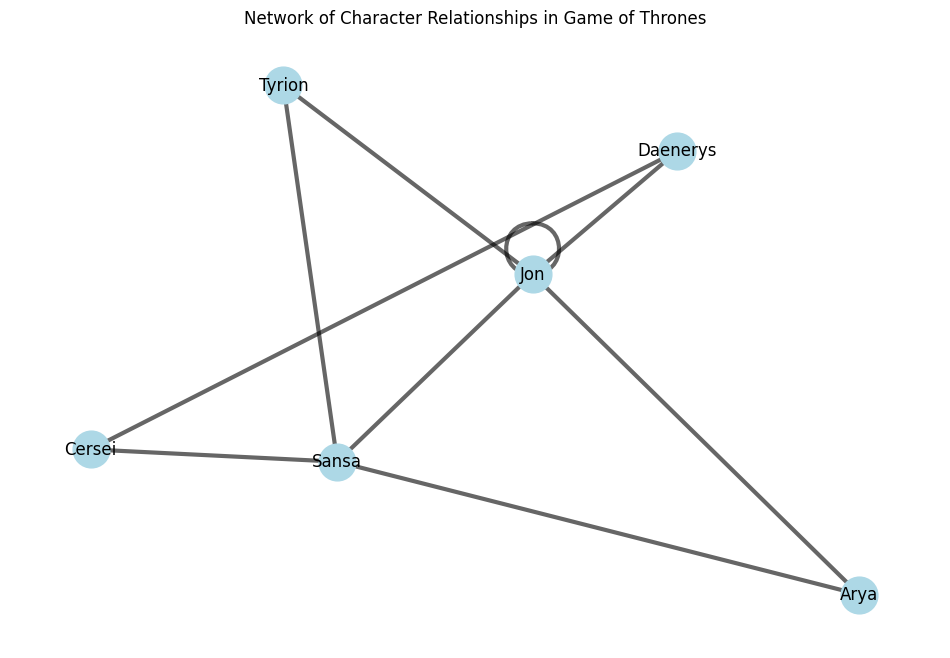

In [41]:
# Step 2: Constructing the Network Graph
import networkx as nx
import matplotlib.pyplot as plt

# Initialize graph
G = nx.Graph()

# Add edges to the graph
for idx, row in relationships_data.iterrows():
    G.add_edge(row['Character_A'], row['Character_B'], weight=row['Mention_Count'])

# Draw the network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=3, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=12)
plt.title('Network of Character Relationships in Game of Thrones')
plt.axis('off')
plt.show()


In [42]:
# Step 3: Analyzing the Network
# Calculating degree centrality of characters
centrality = nx.degree_centrality(G)
sorted_centrality = sorted(centrality.items(), key=lambda item: item[1], reverse=True)

print("Characters by centrality:")
for character, centrality_score in sorted_centrality:
    print(character, centrality_score)

# Detecting communities (cliques) within the network
from networkx.algorithms import community

communities = community.greedy_modularity_communities(G)
for i, comm in enumerate(communities):
    print(f"Community {i+1}: {list(comm)}")


Characters by centrality:
Jon 1.2000000000000002
Sansa 0.8
Arya 0.4
Tyrion 0.4
Daenerys 0.4
Cersei 0.4
Community 1: ['Sansa', 'Jon', 'Arya', 'Tyrion']
Community 2: ['Daenerys', 'Cersei']


In [46]:
additional_textual_columns

['Explain 1 & 2',
 'Explain 4',
 'Explain 6',
 'Ways of watching',
 'Favourite character',
 'Favourite survivor',
 'Book importance',
 'Other stories',
 'Lands peoples',
 'Most memorable',
 'Most uncomfortable',
 'Personal',
 'Winter is coming']

In [48]:
# Create a DataFrame to hold the results
character_enjoyment = pd.DataFrame()

for column in additional_textual_columns:
    for character in characters:
        # Filter the dataset for comments that mention the character
        character_mentions = data[data[column].str.contains(character, case=False, na=False)]
        
        # Calculate the average enjoyment score for those comments
        avg_enjoyment = character_mentions['Enjoyment'].mean()
        
        # Append the result to the character_enjoyment DataFrame
        result = {'Character': character, 'Text_Column': column, 'Average_Enjoyment': avg_enjoyment}
        character_enjoyment = character_enjoyment.append(result, ignore_index=True)


/tmp/ipykernel_2527/2725845834.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  character_enjoyment = character_enjoyment.append(result, ignore_index=True)
/tmp/ipykernel_2527/2725845834.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  character_enjoyment = character_enjoyment.append(result, ignore_index=True)
/tmp/ipykernel_2527/2725845834.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  character_enjoyment = character_enjoyment.append(result, ignore_index=True)
/tmp/ipykernel_2527/2725845834.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  character_enjoyment = character_enjoyment.append(result, ignore_index=True)
/tmp

In [49]:
# Group the results by character and calculate the overall average enjoyment
final_results = character_enjoyment.groupby('Character')['Average_Enjoyment'].mean().reset_index()
print(final_results)


  Character  Average_Enjoyment
0      Arya           1.654340
1    Cersei           1.748229
2  Daenerys           1.757881
3       Jon           1.642740
4     Sansa           1.860426
5    Tyrion           1.747777


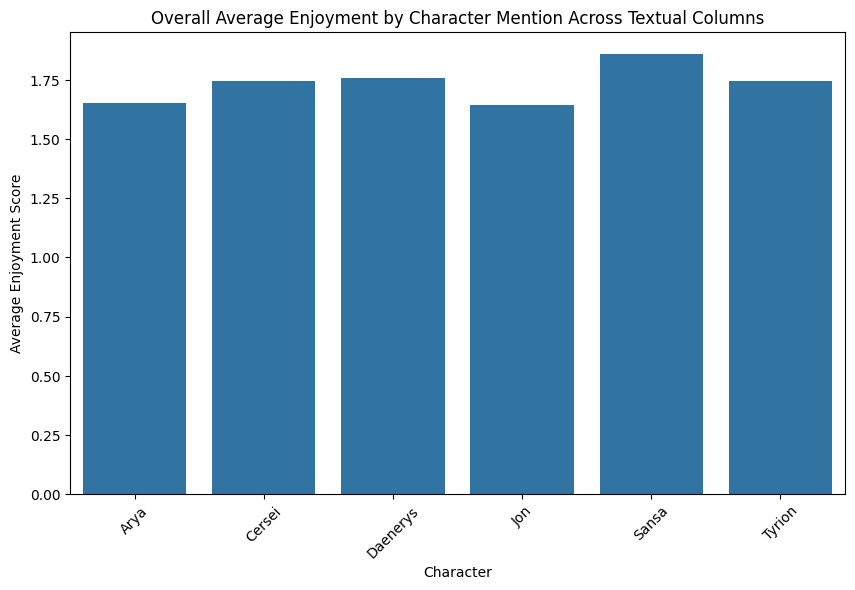

In [50]:
# Plot the overall average enjoyment for each character
plt.figure(figsize=(10, 6))
sns.barplot(x='Character', y='Average_Enjoyment', data=final_results)
plt.title('Overall Average Enjoyment by Character Mention Across Textual Columns')
plt.xlabel('Character')
plt.ylabel('Average Enjoyment Score')
plt.xticks(rotation=45)
plt.show()


- Uniform Enjoyment Scores: The bar heights are quite uniform across all characters, indicating that the average viewer enjoyment does not significantly differ from one character to another based on mentions within the dataset.
- Slight Variations: There are slight variations in the enjoyment scores; for example, characters like 'Jon' and 'Tyrion' seem to have marginally higher scores compared to 'Arya'. This could suggest a slightly more positive viewer response when discussions involve these characters.
- No Extremes: None of the characters have particularly low or high scores, which might suggest that no single character dramatically influences viewer enjoyment, at least not within the scope of this analysis.
- Consistency Across Characters: The enjoyment scores being relatively close in value also suggest that viewers' enjoyment of the show might be influenced more by the overall storyline and production quality than by individual characters.
- Data Interpretation: The analysis assumes that each mention of a character in viewer comments is an indicator of satisfaction and that it is uniformly weighted. The lack of significant variation also raises questions about the sensitivity of the 'Enjoyment' score to character mentions. This might warrant a more nuanced approach to understanding the impact of character narratives on viewer satisfaction.
- Contextual Factors: Since the dataset appears not to reflect drastic changes in enjoyment due to character mentions, it's possible that contextual factors—such as plot twists, character development, or specific events in the show—play a more significant role in influencing viewer satisfaction.

# D) If viewer loyalty to Game of Thrones is influenced by factors such as character survival, adherence to source material, or adherence to traditional storytelling tropes.

In [51]:
data.columns

Index(['ID', 'Enjoyment', 'Commentary', 'Explain 1 & 2', 'Debates',
       'Explain 4', 'Spoilers', 'Explain 6', 'Ways of watching',
       'Favourite character', 'Favourite survivor', 'Kind of story',
       'Book importance', 'Other stories', 'Lands peoples', 'Fantasy roles',
       'Most memorable', 'Most uncomfortable', 'Other activities', 'Age',
       'Sex', 'Class proxy', 'Politics', 'Live', 'Personal',
       'Winter is coming', 'Random', 'Sentiment Explain 1 & 2',
       'Sentiment Explain 4', 'Sentiment Explain 6',
       'Sentiment Ways of watching', 'Sentiment Favourite character',
       'Sentiment Favourite survivor', 'Sentiment Book importance',
       'Sentiment Other stories', 'Sentiment Lands peoples',
       'Sentiment Most memorable', 'Sentiment Most uncomfortable',
       'Sentiment Personal', 'Sentiment Winter is coming'],
      dtype='object')

In [52]:
# Convert 'Favourite survivor' into a binary measure of character survival
data['Survivor'] = data['Favourite survivor'].apply(lambda x: 1 if x != 'None' else 0)

# Assuming 'Kind of story' and 'Book importance' may reflect adherence to source material and traditional storytelling
# You may need to encode these columns into numerical values if they are categorical


In [55]:
data['Enjoyment'].value_counts()

1.0    5435
2.0    3454
3.0    1387
4.0     248
5.0     112
Name: Enjoyment, dtype: int64

In [59]:
# Replace NA values with 5.0 in the 'Enjoyment' column
data['Enjoyment'].fillna(5.0, inplace=True)

In [65]:
data['Loyalty_Proxy'] = data['Enjoyment']

In [64]:
data['Enjoyment'].value_counts()

1.0    5435
2.0    3454
3.0    1387
4.0     248
5.0     114
Name: Enjoyment, dtype: int64

In [61]:
data['Survivor'].value_counts()

1    10635
0        3
Name: Survivor, dtype: int64

In [62]:
len(data)

10638

In [67]:
from scipy.stats import pearsonr

# Correlate character survival with loyalty
survival_correlation, _ = pearsonr(data['Survivor'], data['Loyalty_Proxy'])

print(f"Correlation between character survival and loyalty: {survival_correlation:.3f}")


Correlation between character survival and loyalty: -0.038


In [68]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit and transform 'Kind of story' to numerical labels
data['Kind_of_story_encoded'] = label_encoder.fit_transform(data['Kind of story'])


In [69]:
# Analyze the correlation
correlation_coefficient, p_value = pearsonr(data['Kind_of_story_encoded'], data['Enjoyment'])

print(f'Correlation between encoded kind of story and enjoyment: {correlation_coefficient:.3f}')
print(f'p-value: {p_value:.3f}')


Correlation between encoded kind of story and enjoyment: -0.160
p-value: 0.000


The correlation coefficient of -0.160 indicates a slight negative linear relationship between the encoded 'Kind of story' and 'Enjoyment'. In practical terms, this suggests that as the numerical label for 'Kind of story' increases, there is a slight tendency for 'Enjoyment' scores to decrease. However, since the categories were encoded into numbers arbitrarily, the negative relationship should be interpreted with caution. The numerical encoding does not necessarily reflect a meaningful order unless the 'Kind of story' categories have a natural ranking.

The p-value of 0.000 is an indicator of the statistical significance of the correlation coefficient. A p-value less than 0.05 is typically considered statistically significant, meaning the observed correlation is unlikely to be due to random chance. Here, the p-value suggests that there is a statistically significant relationship between the 'Kind of story' and 'Enjoyment'.

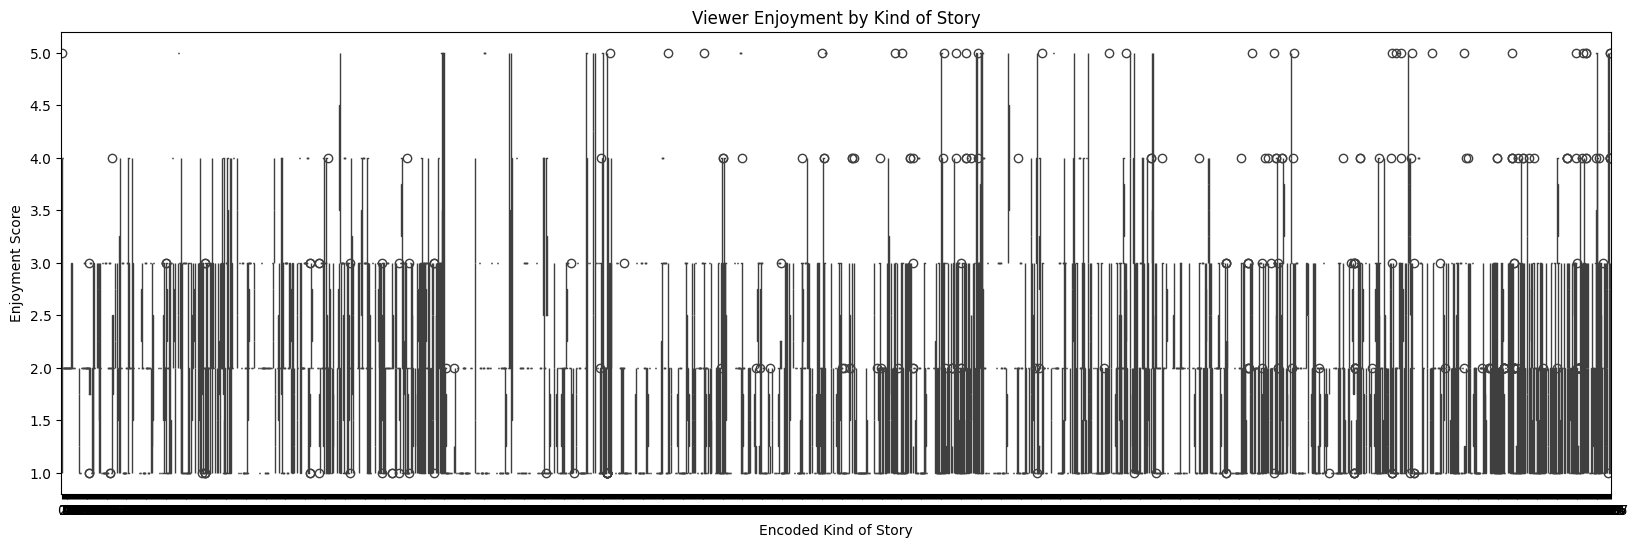

In [71]:
# Plot the relationship between the kind of story and enjoyment
plt.figure(figsize=(20, 36))
sns.boxplot(x='Kind_of_story_encoded', y='Enjoyment', data=data)
plt.title('Viewer Enjoyment by Kind of Story')
plt.xlabel('Encoded Kind of Story')
plt.ylabel('Enjoyment Score')
plt.show()


In [81]:
from transformers import pipeline

pipe = pipeline("zero-shot-classification", task = "text-classification", model = "BAAI/bge-small-en-v1.5", device=0)

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at BAAI/bge-small-en-v1.5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


In [91]:
# Define a function to replace numeric entries and NaNs with "Not Mentioned"
def replace_with_string(value):
    if pd.isnull(value) or isinstance(value, (int, float)):
        return "Not Mentioned"
    return value

# Apply the function to the 'Book importance' column
data['Book importance'] = data['Book importance'].apply(replace_with_string)


In [93]:
data["Book importance"].value_counts()

                                                                                                                                                                                                                                                                   817
No                                                                                                                                                                                                                                                                 491
No.                                                                                                                                                                                                                                                                164
Yes                                                                                                                                                                                                                

In [95]:
# Assuming df is your DataFrame and column_name is the name of the column you want to replace empty strings in
data["Book importance"] = data["Book importance"].replace('', 'not_mentioned')

In [99]:
data["Book importance"].value_counts().reset_index().head(50)

,index,Book importance
0,not_mentioned,817
1,No,491
2,No.,164
3,Yes,156
4,no,108
5,Yes.,53
6,yes,43
7,Not really,42
8,No.,40
9,Not really.,35


In [103]:
candidate_labels = ["yes for book", "no for book", "not mentioned"]

sequence = data["Book importance"].to_list()

pred = pipe(sequence, candidate_labels)



/home/snbhanja/.local/lib/python3.10/site-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [106]:
liked_book_or_not = [x["labels"][0] for x in pred]

In [104]:
len(pred)

10638

In [107]:
data["liked_book_or_not"] = liked_book_or_not

In [108]:
data["liked_book_or_not"].value_counts()

yes for book     6533
not mentioned    4079
no for book        26
Name: liked_book_or_not, dtype: int64

<Axes: >

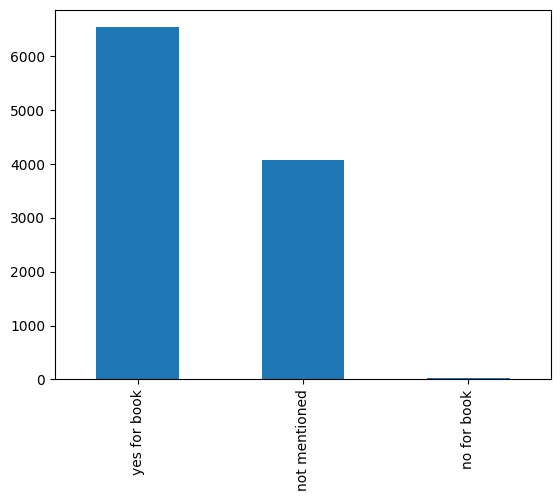

In [109]:
data["liked_book_or_not"].value_counts().plot(kind='bar')

As you can see many people like the reference of the books while very few people didn't liked the book.

In [110]:
data.columns

Index(['ID', 'Enjoyment', 'Commentary', 'Explain 1 & 2', 'Debates',
       'Explain 4', 'Spoilers', 'Explain 6', 'Ways of watching',
       'Favourite character', 'Favourite survivor', 'Kind of story',
       'Book importance', 'Other stories', 'Lands peoples', 'Fantasy roles',
       'Most memorable', 'Most uncomfortable', 'Other activities', 'Age',
       'Sex', 'Class proxy', 'Politics', 'Live', 'Personal',
       'Winter is coming', 'Random', 'Sentiment Explain 1 & 2',
       'Sentiment Explain 4', 'Sentiment Explain 6',
       'Sentiment Ways of watching', 'Sentiment Favourite character',
       'Sentiment Favourite survivor', 'Sentiment Book importance',
       'Sentiment Other stories', 'Sentiment Lands peoples',
       'Sentiment Most memorable', 'Sentiment Most uncomfortable',
       'Sentiment Personal', 'Sentiment Winter is coming', 'Survivor',
       'Loyalty_Proxy', 'Kind_of_story_encoded', 'Book_importance_score',
       'liked_book_or_not'],
      dtype='object')

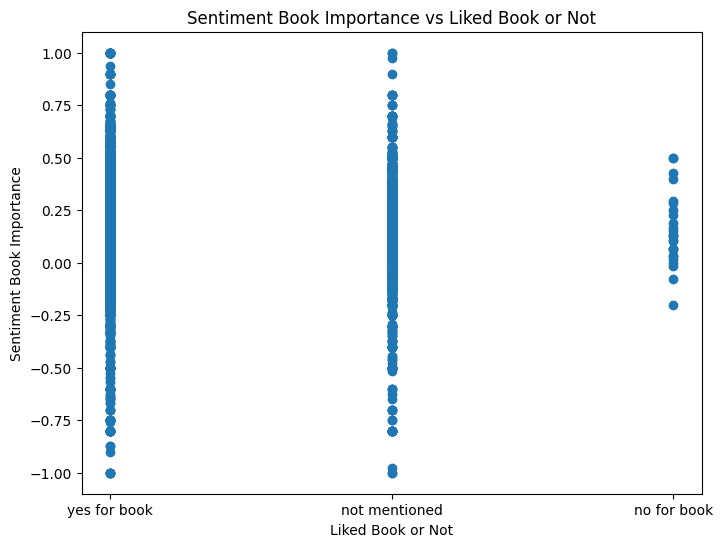

<Figure size 800x600 with 0 Axes>

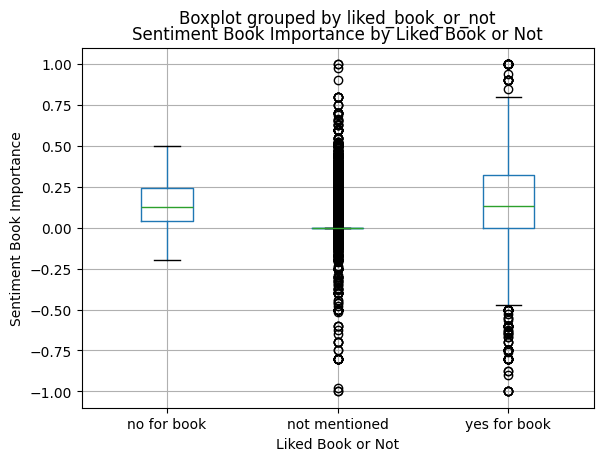

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'data'
# with columns 'liked_book_or_not' and 'Sentiment Book importance

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['liked_book_or_not'], data['Sentiment Book importance'])
plt.title('Sentiment Book Importance vs Liked Book or Not')
plt.xlabel('Liked Book or Not')
plt.ylabel('Sentiment Book Importance')
plt.show()

# Box plot
plt.figure(figsize=(8, 6))
data.boxplot(column='Sentiment Book importance', by='liked_book_or_not')
plt.title('Sentiment Book Importance by Liked Book or Not')
plt.xlabel('Liked Book or Not')
plt.ylabel('Sentiment Book Importance')
plt.show()

From this plot, one can infer that books that are liked ("yes for book") and books that are not liked ("no for book") tend to have a more polarized distribution of sentiment importance, with fewer outliers compared to the "not mentioned" category. This could imply that when people express a preference for a book, the sentiment is more consistently strong (either positive or negative), while books that are not mentioned in terms of like or dislike show a more varied sentiment importance.